In [345]:
import Interpret
from ABCHelpers import *

In [346]:
modelName = 'Young_Shrub'
points = Interpret.getPoints(modelName, {}, includeAngles=True)

In [347]:
import numpy as np

In [348]:
arr = np.array(points)

In [349]:
arr[:,4]

array([ 0.        ,  0.        ,  6.18816564, ..., 84.5586816 ,
       84.39963745, 84.39963745])

In [350]:
stats = calculateStats(points)

In [351]:
for (k,v) in stats.items():
    print(k, ':', v)

parentAngle_mean : 25.195863060209717
parentAngle_variance : 11.590467910996583
length_mean : 3.940314716508171
length_variance : 1.3837981165340396
verticalOrientation_mean : 58.281121293719146
verticalOrientation_variance : 29.837947215223014
horizontalOrientation_mean : 187.16921555614124
horizontalOrientation_variance : 108.41285352273971
q1_xyz : (4.0, 23.3, 4.0)
q2_xyz : (80.56257788879249, 16.813303673843535, 80.31533786589188)
q3_xyz : (80.67765225909002, 28.571302071129743, 79.90378752852888)
xyz : (80.88242674335196, 82.54151793078425, 80.31533786589188)
trunk_length : 20.0
totalBiomass : 1384.704660906751


In [352]:
arr[:,6].mean()

25.195863060209827

In [353]:
arr[:,6].std()

11.59046791099641

In [354]:
import matplotlib.pyplot as plt

In [355]:
#Fed up of accessing via numerical values
# Format of points is:
# 0--1--2--3--4--5--6--7
# x  y  z  r  vA hA pA l
keys = {
    'x': 0,
    'y': 1,
    'z': 2,
    'radius': 3,
    'vertical orientation': 4,
    'horizontal orientation': 5,
    'parent angle': 6,
    'length': 7
}

(array([206., 182., 188., 184., 192., 182., 158., 182., 168., 170., 194.,
        164., 132., 154., 182., 144., 138., 138., 186., 164., 154., 154.,
        170., 162., 180., 218., 178., 172., 198., 218., 226., 190., 264.,
        224., 242., 202.]),
 array([2.40324059e-01, 1.02324863e+01, 2.02246484e+01, 3.02168106e+01,
        4.02089728e+01, 5.02011350e+01, 6.01932972e+01, 7.01854594e+01,
        8.01776216e+01, 9.01697838e+01, 1.00161946e+02, 1.10154108e+02,
        1.20146270e+02, 1.30138433e+02, 1.40130595e+02, 1.50122757e+02,
        1.60114919e+02, 1.70107081e+02, 1.80099244e+02, 1.90091406e+02,
        2.00083568e+02, 2.10075730e+02, 2.20067892e+02, 2.30060055e+02,
        2.40052217e+02, 2.50044379e+02, 2.60036541e+02, 2.70028703e+02,
        2.80020866e+02, 2.90013028e+02, 3.00005190e+02, 3.09997352e+02,
        3.19989514e+02, 3.29981676e+02, 3.39973839e+02, 3.49966001e+02,
        3.59958163e+02]),
 <a list of 36 Patch objects>)

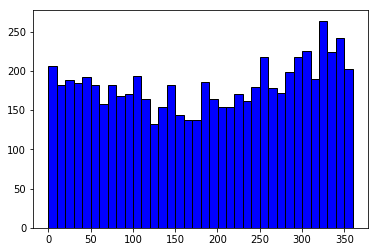

In [356]:
plt.hist(arr[:,keys['horizontal orientation']], color='blue', edgecolor='black', bins=36)

In [357]:
# Problem with this horizontal orientation graph is that it weights all nodes equally, regardless of size and mass
# Create metric that calculates biomass for each thing, then adds that many of itself to distribution.

weighted_ps = []

In [358]:
arr.shape[0]/2

3280.0

In [359]:
ps = zip(points[::2], points[1::2])

In [360]:
weights = np.array([volumeOfConic(r1,r2,l) for ((x,y,z,r1,va,ha,pa,l),(x2,y2,z2,r2,va2,ha2,pa2,l2)) in ps])

In [361]:
weights.sum()

1384.7046609068034

In [362]:
n = weights.shape[0]
n

3280

In [363]:
import math

In [364]:
points[34]

(21.465773689986673,
 65.29062161880921,
 -13.372065619371178,
 0.09804455781250004,
 120.71346276621667,
 308.92377687948465,
 43.513235002450024,
 3.2484121256644913)

In [365]:
for i in range(n):
    for j in range(math.floor(math.log(weights[i]))):
        weighted_ps.append(points[2*i])

In [366]:
weighted_ps = np.array(weighted_ps)
weighted_ps.shape
weighted_ps[3]

array([  0.,   0.,   0.,   2.,   0., 270.,   0.,  20.])

(array([2., 1., 2., 0., 0., 4., 3., 1., 1., 5., 0., 1., 0., 0., 4., 0., 3.,
        1., 1., 1., 1., 0., 1., 8., 0., 4., 1., 5., 0., 1., 2., 4., 1., 2.,
        7., 4.]),
 array([  1.21742206,  10.99247909,  20.76753612,  30.54259315,
         40.31765018,  50.09270721,  59.86776424,  69.64282127,
         79.4178783 ,  89.19293533,  98.96799236, 108.74304939,
        118.51810643, 128.29316346, 138.06822049, 147.84327752,
        157.61833455, 167.39339158, 177.16844861, 186.94350564,
        196.71856267, 206.4936197 , 216.26867673, 226.04373376,
        235.81879079, 245.59384782, 255.36890485, 265.14396188,
        274.91901891, 284.69407594, 294.46913297, 304.24419   ,
        314.01924703, 323.79430406, 333.56936109, 343.34441813,
        353.11947516]),
 <a list of 36 Patch objects>)

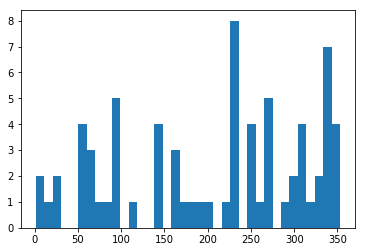

In [367]:
plt.hist(weighted_ps[:, keys['horizontal orientation']], bins=36)

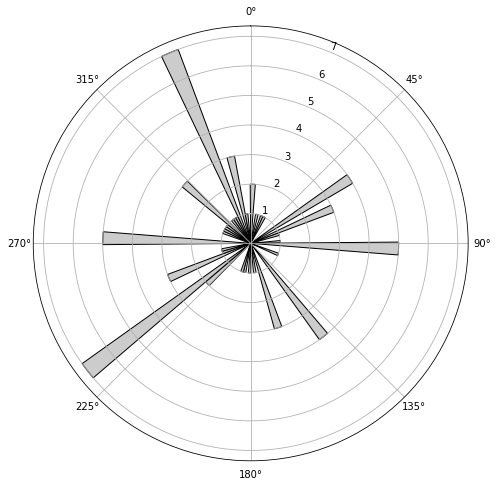

In [370]:
degrees = weighted_ps[:,keys['horizontal orientation']]
radians = np.deg2rad(degrees)

bin_size = 5
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()